<a href="https://colab.research.google.com/github/keng-oh/colab/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1 マージン最大化
SVM（Support Vector Machine）とは､｢マージン最大化｣というコンセプトに基いて分類を行う線形分類器です｡このコンセプトには汎化性能を高めるための工夫が込められており､これによってパーセプトロンやロジスティック回帰よりも高い識別性能を実現しています｡また､SVMには非線形の分離にも対応できるという非常に大きな大きな利点があります｡現在では､Deep Learningが高い識別性能を実現するとして最も注目を集めていますが､ひと昔前はSVMがその位置を飾っていました｡しかし､Deep Learningには必要なデータ量や計算量が膨大になるなどの難点もありますので､SVMはそれを補うモデルとして今でも広く使われています｡

## 分析ストーリー : 植物の種分化研究②
今回の分析ストーリーは､植物研究におけるアヤメの花の品種分類の延長とします｡パーセプトロンよりも汎化性能の高いモデルを利用して分類を行うことを目指します｡

まずは､SVMのコンセプトである｢マージン最大化｣について学びます｡8.1.1項でイメージを掴み､8.1.2項でそのイメージを数式に落とし込みましょう｡可視化のために､今回は2次元の場合を中心に解説をしますが､コアとなる考え方は､そのまま高次元でも成り立ちます｡また､この節では線形分離可能な場合にのみ的を絞って解説します｡線形分離不可能な場合については次以降の節で取り上げます｡

## 8.1.1 良い境界線と悪い境界線
分類問題で定める決定境界には良し悪しがあります｡また､教師あり学習では将来への予測性能を最大化することを目指すため､当然その評価基準は汎化性能になります｡境界線を定めようとしたとき､既知のデータを完全に分離できてさえいれば良いということであれば､その境界線は無数に取ることができます｡

しかし､新しいサンプルが得られたときに誤分類をしないようにと考えると､他のクラスに最も近いサンプルから最大限距離をとっておくべきということがわかります｡そのようなサンプルを通る直線をサポートベクトルといい､サポートベクトル間の距離をマージンといいます｡このマージンを最大化するのがマージン最大化です｡また､境界線はこのサポートベクトルの中間に定められます｡

## 8.1.2 マージンの算出
この項では､マージン最大化のコンセプトを数式に落とし込みます｡目的関数はどのようなものか､あるいは制約条件はどのようなものかを知ることが目的です｡実は､マージンは高校数学の点と直線の距離の公式さえわかれば簡単に求めることができます｡順を追って進めていきましょう｡まずは､図のように以下の6つの前提を設定します｡

境界線の方程式が何かしら定まっているとする
2本のサポートベクトルは､ 境界線を上下に同じ$a(> 0)$だけ平行移動してつくられる
このとき､境界線とサポートベクトルの距離を$d$とする
マージンは､その2倍なので$2d$とおける
プラス側のサポートベクトルが通るサンプルの座標を$\boldsymbol{x_{pos}} = (x_1^{(i)}, x_2^{(i)})$とする
各サンプルの正解ラベルを､プラス側は$y^{(j)} = +1$､マイナス側は$y^{(j)} = -1$とする。

 は境界線とサポートベクトルの距離ですが､プラスのサポートベクトル上に点$\boldsymbol{x_{pos}}$が存在することから､ 境界線と点$\boldsymbol{x_{pos}} = (x_1^{(i)}, x_2^{(i)})$の点と直線の距離でもあります｡すると､以下の式が成り立ちます｡また､このとき$\sqrt{{w_1}^2 + {w_2}^2} = \| \boldsymbol{w} \|$です｡
 
 $
 \begin{eqnarray}
d &=& \frac{|w_0x_0^{(i)} + w_1{x_1}^{(i)} + w_2{x_2}^{(i)}|}{\sqrt{{w_1}^2 + {w_2}^2}} = \frac{|w_0x_0^{(i)} + w_1{x_1}^{(i)} + w_2{x_2}^{(i)}|}{\| \boldsymbol{w} \|} ･･･ (1)\\
\end{eqnarray}
 $
 
 また､点$\boldsymbol{x_{pos}}$はプラスのサポートベクトル上の点なので､以下の式が成り立ちます｡
 
 $w_0x_0^{(i)} + w_1x_1^{(i)} + w_2x_2^{(i)} = -a ･･･(2)$
 
 すると､ $1$と$2$より
 
 $\begin{eqnarray}
margin &=& 2d = 2 \times \frac{|-a|}{\| \boldsymbol{w} \|} = \frac{2a}{\| \boldsymbol{w} \|}\\
\end{eqnarray}$

よって､マージンの大きさを求めることができました｡また､今回は2次元の特徴空間を前提にしていましたが､この式は高次元でも同様に成り立ちます｡

## 8.1.3 SVMの定式化
このマージンがSVMの目的関数の原型となるわけですが､この式をもう少しきれいにしていきます｡

まず､  $a$は定数ですのでマージン
$\begin{eqnarray}
\frac{2a}{\| \boldsymbol{w} \|}
\end{eqnarray}$
を最大化することは
$\begin{eqnarray}
\frac{1}{\| \boldsymbol{w} \|}
\end{eqnarray}$
を最大化することと同じです｡また､勾配降下法による最小化問題に帰着させるために逆数をとり､  
$\begin{eqnarray}
\| \boldsymbol{w} \|
\end{eqnarray}$
の最小化を目指します｡さらに､計算処理の都合上  
$\begin{eqnarray}
\| \boldsymbol{w} \|^2
\end{eqnarray}$
を計算するほうが内積を求めるだけで良いので楽です｡ここで､  
$\begin{eqnarray}
\| \boldsymbol{w} \|^2
\end{eqnarray}$
を最小化することは  
$\begin{eqnarray}
\| \boldsymbol{w} \|
\end{eqnarray}$を最小化することと同じであるため､目的関数は以下のように設定できます｡そして､微分をしたときのために $\begin{eqnarray}
\frac{1}{2}
\end{eqnarray}$
を掛け算して完成です｡

$L(\boldsymbol{w}) = \frac{1}{2} ||w||^2$

ただし､ここに制約条件があることに気をつけてください｡ここまでの定式化は､データが完全に線形分離可能であることが前提になっています｡なので､その前提条件を制約式に落とし込む必要があります｡線形分離が可能ということは､正解ラベルが$y^{(i)} = +1$のデータ点は必ず境界線のプラス側に$(y(\boldsymbol{x} > 0))$､同様に$y^{(i)} = -1$のデータ点は必ず境界線のマイナス側にある$(y(\boldsymbol{x}) < 0)$ことと同じです｡つまりは､正解ラベルと線形入力が必ず同符号になります｡よって､以下の条件式が満たされます｡

$y \times y(\boldsymbol{x}) > 0$

以上より､SVMは以下のように定式化されます｡

$L(\boldsymbol{w}) = \frac{1}{2} ||w||^2$
$s.t.\  y \times y(\boldsymbol{x}) > 0$

## 8.1.4 線形分離可能なデータで実装
線形分離可能なデータを利用するため､irisのデータセットからSetosaとVersicolourを利用します｡

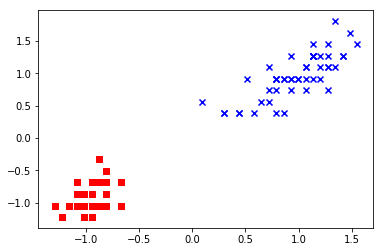

In [0]:
# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

# irisデータセットの読み込み
# 品種: SetosaとVersicolour（線形分離可能）
# 変数: petal lengthとpetal width
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[:100,[2,3]]
y_1 = iris.target[:100]

# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

# 散布図を出力
plt.scatter(X_1_std[:50, [0]], X_1_std[:50, [1]], color='red', marker='s')
plt.scatter(X_1_std[50:100, [0]], X_1_std[50:100, [1]], color='blue', marker='x')
plt.show()

### SVCクラスの利用
SVMはsklearn.svmに収録されているSVC（Support Vector Classifier）クラスを利用して実行できます｡また､kernelという引数をlinearに設定しておけば､線形SVMが実行されます｡このkernelに関しては8.4節で詳しく解説します｡

In [0]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_std, y_1, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


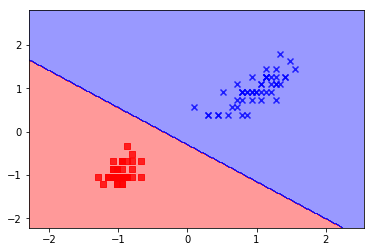

In [0]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()
    
# 決定曲線をプロットする関数
plot_decision_regions(X_1_std, y_1, svc)

In [0]:
# 正答率を出力
svc.score(X_1_test, y_1_test)

1.0

## 8.2 スラック変数の導入
この節では､線形分離不可能①の場合に対応する手法を紹介します｡この場合は､異なるクラスのサンプルが近くにあったり､外れ値があったりして通常のマージンが定義できない状態です｡この場合には､線形分離できない一部のサンプルを無視してでも､それ以外のすべてのサンプルに対して当てはまりのいいような決定境界を定めることを目指します｡これを実現するために､スラック変数というものを導入します｡スラックという単語は｢緩さ｣を意味し､モデルに一部のサンプルの誤分類を許容させることができます｡

### 8.2.1 スラック変数
スラック変数とは､モデルに一部のサンプルの誤分類を許容させるための定数です｡通常  $\xi$で表記され､各サンプルが他クラスの領域に入り込んでしまった度合いを表しています｡また､誤分類を許容したときのマージンをソフトマージンといい､許容しないときのマージンをハードマージンといいます｡ソフトマージンの場合の誤差関数は以下のように定式化されます｡

#### $C$の役割
また､係数である$C$は､誤分類をどの程度許すかを調整する正則化パラメータです｡正則化における$α$と同様に扱われます｡これを小さくすればするほど誤分類に寛大になり､一部のサンプルの誤分類を許してでも､その他のサンプルについてマージンの大きい境界線を定めます｡逆に､大きくすればするほど誤分類に厳しくなり､全体的な当てはまりよりも誤分類の度合いを減らすことを重視するようになります｡

### 8.2.2 線形分離不可能①のデータで実装
線形分離不可能①なデータを利用するため､irisのデータセットからVersicolourとVirsinicaを利用します｡

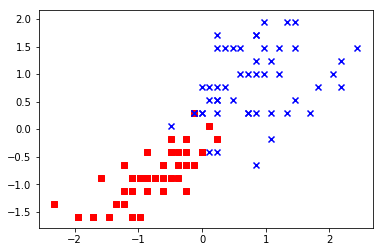

In [0]:
# irisデータセットの読み込み
# 品種: VersicolourとVirsiniga（線形分離不可能①）
# 変数: petal lengthとpetal width
from sklearn.datasets import load_iris
iris = load_iris()
X_2 = iris.data[50:150,[2,3]]
y_2 = iris.target[50:150]

# データの標準化
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
scaler_2.fit(X_2)
X_2_std = scaler_2.transform(X_2)
# 散布図を出力
plt.scatter(X_2_std[:50, [0]], X_2_std[:50, [1]], color='red', marker='s')
plt.scatter(X_2_std[50:100, [0]], X_2_std[50:100, [1]], color='blue', marker='x')
plt.show()

In [0]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_std, y_2, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc_slack = SVC(kernel='linear', C=1.0)
svc_slack.fit(X_2_train, y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


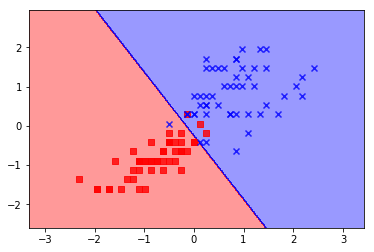

In [0]:
# 決定境界の出力
plot_decision_regions(X_2_std, y_2, svc_slack)

In [0]:
# 正答率を出力
svc_slack.score(X_2_test, y_2_test)

0.9666666666666667

## 8.3 カーネル法の導入
この節では､線形分離不可能②の場合に対応する手法を紹介します｡この場合は､境界線が非線形でないとうまくいかないという状態です｡よって､決定境界を非線形にする処理を行う必要があり､それを実現させる手法をカーネル法といいます｡現実世界にあるデータは線形分離不可能②のパターンに該当するものが非常に多いため､これを導入することによってSVMの分類性能は飛躍的に向上します｡

### 8.3.1 XORパターン
XOR（exclusive or, 排他的論理和）は､線形分離不可能②に該当するパターンの代表格です｡上下左右の4つの位置があったとき､斜め2箇所ずつに同じクラスが配置されているのですが､これはどうやっても直線で分離することができません｡この節ではXORのパターンに従うデータを非線形で分離することを目指します｡



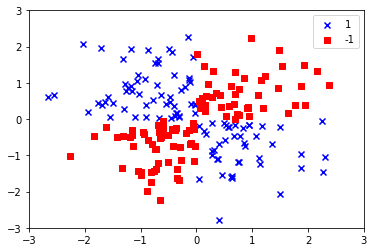

In [0]:
# XORのデータの作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [0]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

## 8.3.2 カーネル法
カーネル法とは､線形分離を高次元空間内で行うことで非線形分離を可能にする方法です｡カーネル法の発想は､非線形分離をするために､決定境界ではなく特徴空間の方を歪めてしまおうというものです｡まず､各サンプルが表すデータ点を､射影関数$\Phi$によって高次元の空間に移動させます｡なぜなら､一般に高次元空間内の方が線形分離がしやすいからです｡そして､射影先で線形分離をしたのち､その逆関数$\Phi^{-1}$を通すことによって､データ点をもといた特徴空間に戻します｡すると､高次元空間で線形だった決定境界も一緒に変換され､低次元の特徴空間では曲線になります｡このようなステップを踏むと､SVMによる非線形分離が可能になります｡

## 8.3.3 カーネルトリック
カーネルトリックとは､内積の計算式を簡単な式で置き換えることによって､カーネル法の計算量を削減する方法です｡実は､カーネル法には計算コストが大きいという問題点があります｡カーネルSVMは仕組み上､高次元空間内で線形SVMの学習を行わなければなりません｡そして､このときすべての$x_j^{(i)}$が複雑な関数値に置き換えられることになります｡すると､学習の過程で何度も行われる内積計算が大きな負担になります｡このままでは､大規模なデータを学習させることが難しくなるので､なんとかしてこれを克服したいところです｡

カーネル関数
カーネル関数とは､データ点の類似性を定量化する関数です｡基底関数のように新たな特徴量を生成して､その特徴量による線形分類が高次元空間での線形分類を意味するような変換が行われます｡

RBFカーネル
RBFカーネル（別名: 動径基底関数カーネル､ガウスカーネル）とは､カーネル関数の一種です｡カーネル関数には種類があり､それぞれによって空間の歪め方が異なります｡カーネルの中で最もよく使われるのがこのRBFカーネルであり､kernel引数のデフォルト値もこれと同じになっています｡以下のような式で表され､内積計算に置き換えて利用することができます｡


$\Phi(x_1)^T \Phi(x_2) = K(x_1 ,x_2) = \exp \Bigl ( - \gamma \ ||x_1 - x_2||\Bigr )$


 $\gamma$は｢空間の歪め度合い｣を調整するハイパーパラメータとなり､ $\gamma$が大きいほど境界線が複雑になります｡小さくしすぎると線形分類器と変わらなくなってしまいますし､大きくしすぎると過学習を起こしてしまいます｡これもやはり､ちょうどいい値に調整する必要があります｡

## 8.3.4 カーネルSVMの実装
###線形SVM

In [0]:
# 線形SVMによる学習
linear_svm = SVC(kernel='linear', C=0.1)
linear_svm.fit(X_xor_train, y_xor_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


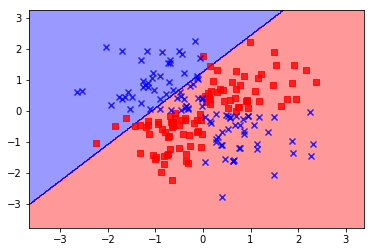

In [0]:
# 決定曲線のプロット
plot_decision_regions(X_xor, y_xor, classifier=linear_svm)

In [0]:
# 正答率を出力
linear_svm.score(X_xor_test, y_xor_test)

0.6166666666666667

### カーネルSVM
kernel引数をrbfに指定すると､rbfカーネルによるカーネルトリックを利用することができます｡gamma引数を調整することによって､次元を歪める度合いを指定できます｡

In [0]:
# カーネルSVMによる学習
# C: 誤分類への厳しさ
# gamma: 決定曲線の複雑さ
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=10)
rbf_svm.fit(X_xor_train, y_xor_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


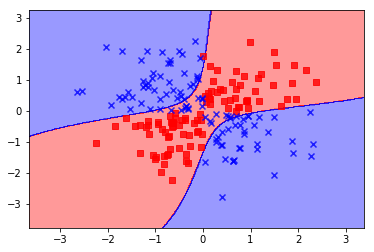

In [0]:
# 決定曲線のプロット
plot_decision_regions(X_xor, y_xor, classifier=rbf_svm)

In [0]:
# 正答率を出力
rbf_svm.score(X_xor_test, y_xor_test)

0.9

また､$\gamma$や$C$を変えながら決定境界と精度を観察すると以下のようになります｡  
$C$と同様に$\gamma$の設定も性能向上と過学習のトレードオフになり､何かしらの｢ちょうどいい値｣が存在することがわかります。

このように、RBFカーネルを使用するとXORデータを綺麗に非線形分類できることが分かりました。

ここで気をつけておきたいのは、$\gamma$のチューニングです｡  
$\gamma$の値を少しずつ変えていけばわかるかと思いますが､非線形の場合は特に､このパラメータによって境界線の引かれ方が大きく変わってきます｡  
$\gamma$を最適な数値に設定して､過学習を抑制する工夫が必要です。

次回からは、そのために必要な汎化能力の評価について学んでいきます｡新たな評価指標や交差検定などの概念を勉強していきます。